In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
# Đọc dữ liệu từ file CSV
dfdata = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/NLMH_OnkiemTra/Chap2_Classification_3SVM/Social_Network_Ads.csv')
print(dfdata)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [4]:
# Cắt dữ liệu lại còn lại 150 mẫu
dfdata = dfdata.iloc[:350]
print(dfdata.shape[0]) # in ra số mẫu

350


In [5]:
dfdata['Gender'] = dfdata['Gender'].map({'Male': 0, 'Female': 1})

<ipython-input-5-1e09b74a1e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata['Gender'] = dfdata['Gender'].map({'Male': 0, 'Female': 1})


In [6]:
# Chia feature và label
X = dfdata.drop(['User ID', 'Purchased'], axis=1)

In [7]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [8]:
X_2D = dfdata[['Age', 'EstimatedSalary']]
X_2D.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
y = dfdata['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
# Chia tập dữ liệu thành train set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Huấn luyện mô hình SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state = 0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
# Đánh giá mô hình trên tập test
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8285714285714286


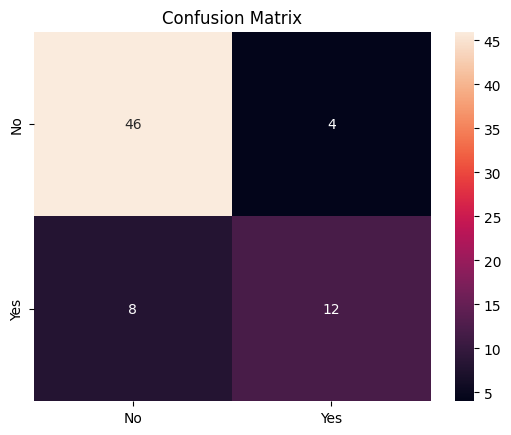

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.75      0.60      0.67        20

    accuracy                           0.83        70
   macro avg       0.80      0.76      0.78        70
weighted avg       0.82      0.83      0.82        70



In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán trên tập test
y_pred = svm_model.predict(X_test)

# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')

plt.show()

# In ra các chỉ số đánh giá mô hình
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

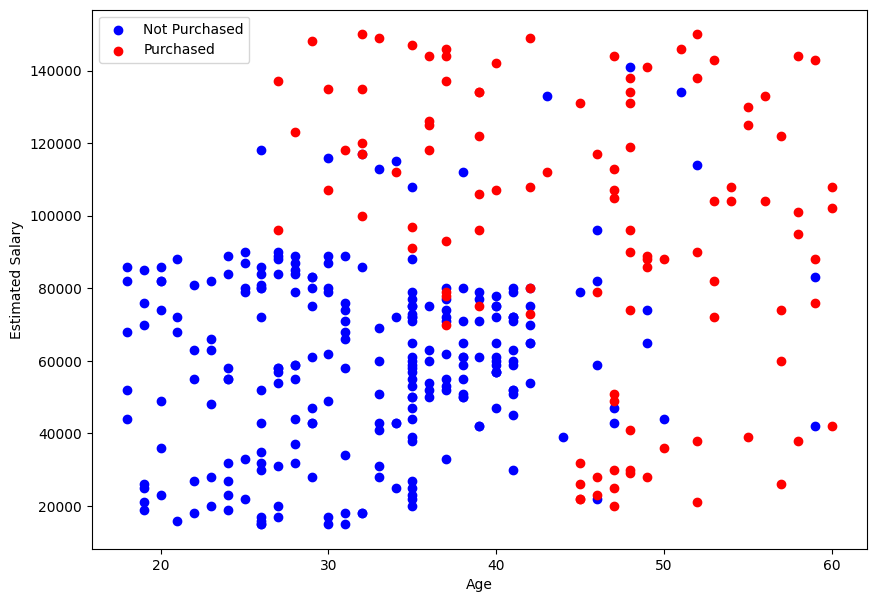

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(dfdata[dfdata['Purchased'] == 0]['Age'],
            dfdata[dfdata['Purchased'] == 0]['EstimatedSalary'],
              color='b', label='Not Purchased')

plt.scatter(dfdata[dfdata['Purchased'] == 1]['Age'],
            dfdata[dfdata['Purchased'] == 1]['EstimatedSalary'],
              color='r', label='Purchased')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
# Chia tập dữ liệu thành train set và test set
X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
from sklearn.svm import SVC

svm_model2D = SVC(kernel='linear', random_state = 0)
svm_model2D.fit(X_train2D, y_train2D)

SVC(kernel='linear', random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-16-6ed03c02cbc1>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


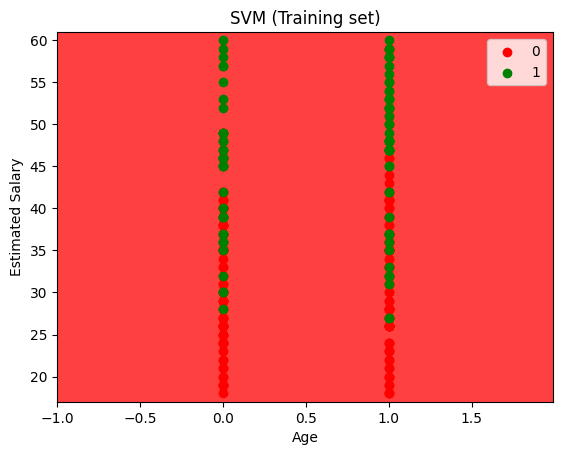

In [16]:
# Visualising the Training set results
import numpy as np

from matplotlib.colors import ListedColormap

X_set, y_set = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svm_model2D.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


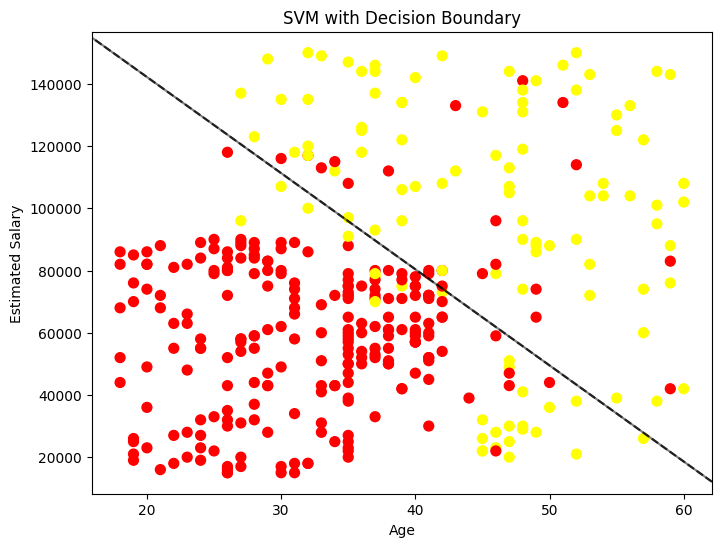

In [17]:
# vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))

# Tạo biểu đồ scatterplot của dữ liệu bằng cách sử dụng hai đặc trưng đầu tiên:
plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=y, s=50, cmap='autumn')

# vẽ đường ranh giới quyết định của mô hình - Xác định phạm vi hiện tại của biểu đồ trên cả hai trục:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# tạo ma trận grid để dự đoán - Tạo ma trận grid để dự đoán, sử dụng phạm vi đã xác định:
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# lấy giá trị quyết định từ mô hình SVM - Lấy giá trị quyết định từ mô hình SVM cho mỗi điểm trên ma trận grid:
Z = svm_model2D.decision_function(xy).reshape(XX.shape)

# vẽ đường ranh giới quyết định và margin - Vẽ đường ranh giới quyết định và margin của mô hình:
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Đặt lại phạm vi của trục x và y để phù hợp với dữ liệu ban đầu:
plt.xlim(xlim)
plt.ylim(ylim)

# Thêm nhãn cho các trục và tiêu đề cho biểu đồ:
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM with Decision Boundary')

# Hiển thị biểu đồ:
plt.show()

In [18]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


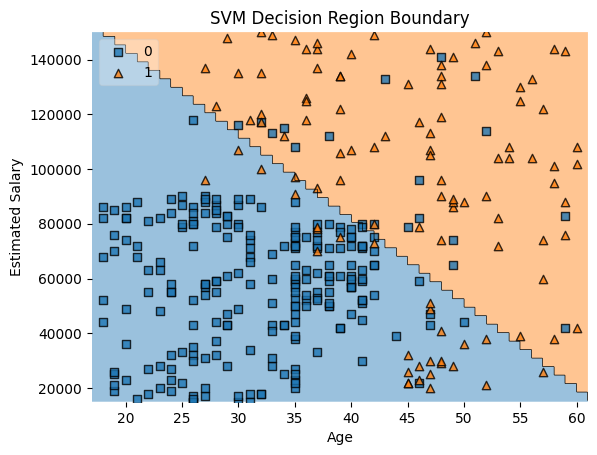

In [19]:
from mlxtend.plotting import plot_decision_regions

# Chuyển đổi y thành mảng numpy
y_numpy = y.to_numpy()

# Vẽ biểu đồ vùng quyết định
plot_decision_regions(X_2D.to_numpy(), y_numpy, clf=svm_model2D, legend=2)

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM Decision Region Boundary')
plt.show()

In [ ]:
X_3D = X

# Chia tập dữ liệu thành train set và test set
X_train3D, X_test3D, y_train3D, y_test3D = train_test_split(X_3D, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
from sklearn.svm import SVC

svm_model3D = SVC(kernel='linear', random_state = 0)
svm_model3D.fit(X_train3D, y_train3D)

In [ ]:
import plotly.express as px

# Tạo DataFrame từ dữ liệu của bạn
df = pd.DataFrame({
    'Sex': X_3D.iloc[:, 0],
    'Age': X_3D.iloc[:, 1],
    'Estimated Salary': X_3D.iloc[:, 2],
    'Purchased': y
})

fig = px.scatter_3d(df,
                    x='Sex',
                    y='Age',
                    z='Estimated Salary',
                    color='Purchased',
                    labels={'Purchased': 'Purchased'})

fig.update_traces(marker=dict(size=3))

# Cập nhật kích thước biểu đồ
# fig.update_layout(width=1200, height=700)
fig.update_layout(height=1100)

fig.show()